In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.graphics.tsaplots import plot_acf

Setting the 'Order Date' column as the index means that we are making the 'Order Date' column as the primary index column for the dataframe. Parsing dates means that we are telling pandas to convert the string representation of dates in the 'Order Date' column into an actual date format that pandas understands, so we can perform time series analysis on it.

In [ ]:
df = pd.read_csv('StockX-Data.csv')

In [ ]:
df

Order Date   Brand                                   Sneaker Name  \
0       9/1/2017   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1       9/1/2017   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2       9/1/2017   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3       9/1/2017   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4       9/1/2017   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951  2/13/2019   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952  2/13/2019   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953  2/13/2019   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954  2/13/2019   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955  2/13/2019   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

      Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0         $1,097         $220    9/24/2016       11.0    California  
1           $685         $220   11/23/2016       11.0    California  
2           $690         $220   11/23/2016       11.0    California  
3         $1,075         $220   11/23/2016       11.5      Kentucky  
4           $828         $220    2/11/2017       11.0  Rhode Island  
...          ...          ...          ...        ...           ...  
99951       $565         $220   12/26/2018        8.0        Oregon  
99952       $598         $220   12/26/2018        8.5    California  
99953       $605         $220   12/26/2018        5.5      New York  
99954       $650         $220   12/26/2018       11.0    California  
99955       $640         $220   12/26/2018       11.5         Texas  

[99956 rows x 8 columns]

Check the shape and column names of the dataset to ensure it has been loaded correctly.

In [ ]:
print(df.shape)
print(df.columns)

(99956, 8)
Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')


**Data Cleaning**

In [ ]:
#Removing Dollar sign from sales price and retail price 
df['Sale Price'] = df['Sale Price'].str.replace(',', '').str.replace('$', '').astype(float)
df['Retail Price'] = df['Retail Price'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-5-23aeca450ec8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sale Price'] = df['Sale Price'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-5-23aeca450ec8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Retail Price'] = df['Retail Price'].str.replace(',', '').str.replace('$', '').astype(float)


In [ ]:
# Convert 'Release Date' column to datetime type
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(97116, 8)


We removed rows that had exactly the same values across all columns. This is important because having duplicate rows can bias our analysis and models. For example, if we have a model that tries to predict sneaker prices, having duplicate rows in our data could cause the model to place too much weight on certain features or underestimate the variance in our data.

In [ ]:
# check the datatypes of the columns
print(df.dtypes)

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price           float64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


Checking for outliers

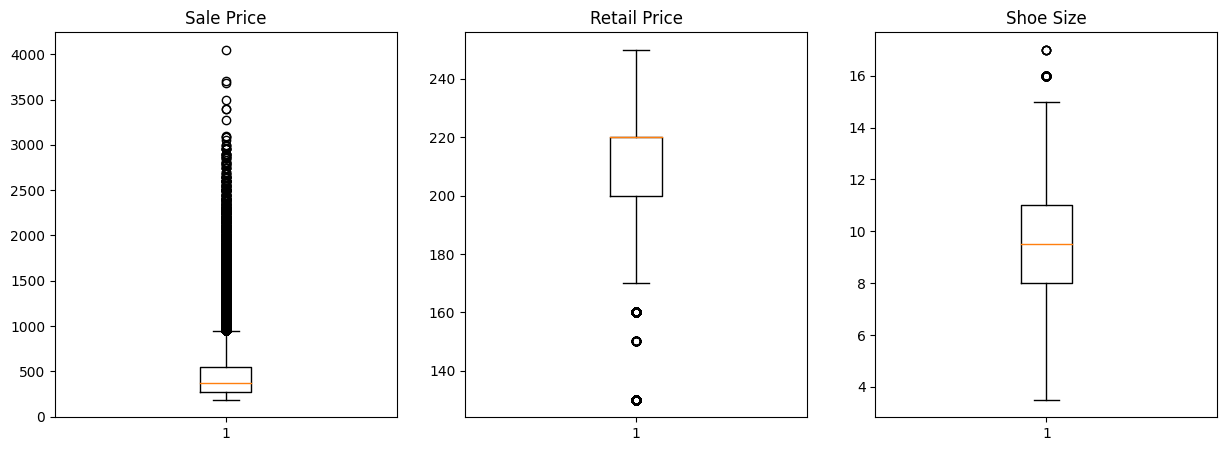

In [ ]:
# Create boxplots for Sale Price, Retail Price, and Shoe Size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(df['Sale Price'])
axs[0].set_title('Sale Price')
axs[1].boxplot(df['Retail Price'])
axs[1].set_title('Retail Price')
axs[2].boxplot(df['Shoe Size'])
axs[2].set_title('Shoe Size')
plt.show()


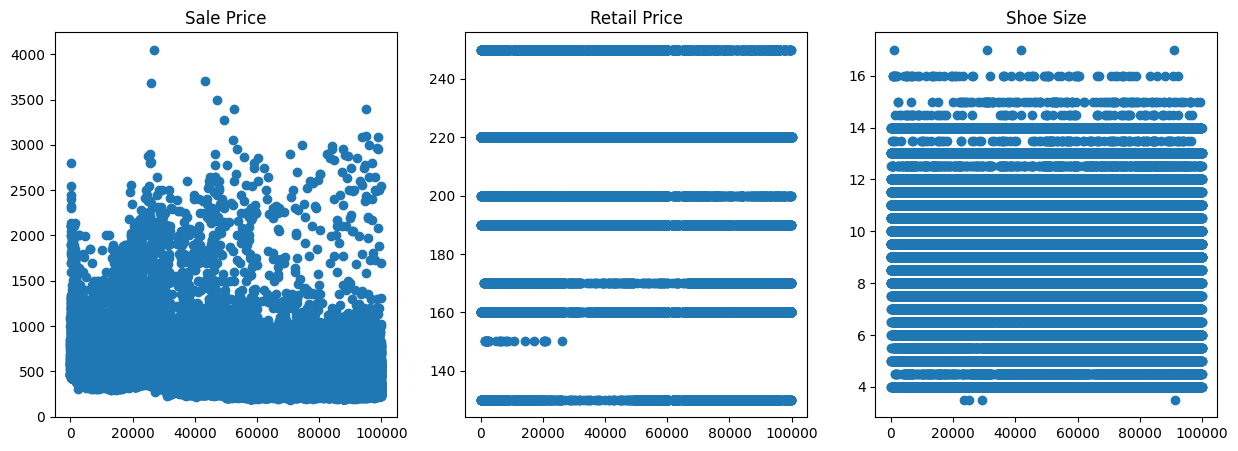

In [ ]:
# Create scatter plots for Sale Price, Retail Price, and Shoe Size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df.index, df['Sale Price'])
axs[0].set_title('Sale Price')
axs[1].scatter(df.index, df['Retail Price'])
axs[1].set_title('Retail Price')
axs[2].scatter(df.index, df['Shoe Size'])
axs[2].set_title('Shoe Size')
plt.show()

Removing outliears for Sale Price

In [ ]:
# Define the numeric column
num_col = 'Sale Price'

# Remove the outliers in the Sale Price column
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df[num_col] >= lower_bound) & (df[num_col] <= upper_bound)]

Text(0, 0.5, 'Count')

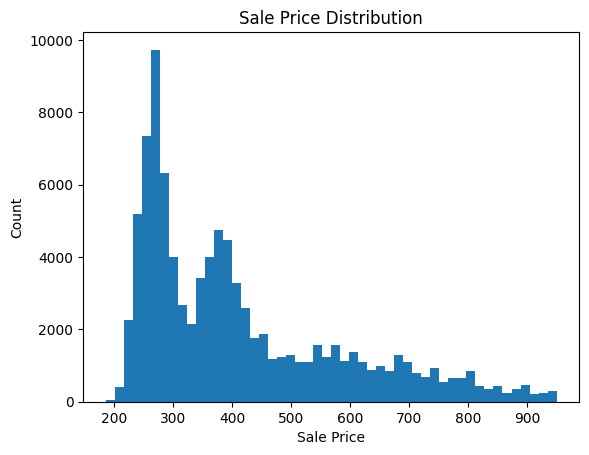

In [ ]:
# create a histogram for Sale Price
plt.hist(df['Sale Price'], bins=50)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')

a higher frequency on the left side that decreases as it goes to the right would indicate a left-skewed distribution. In this case, the majority of the data is on the right side, with a few extreme values on the left.

Checking missing values

In [ ]:
 print(df.isnull().sum())

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64


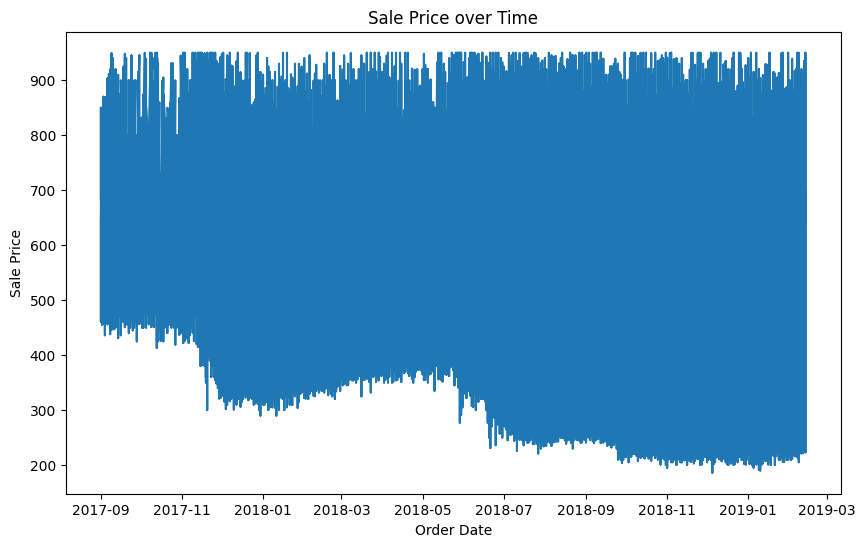

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Order Date'], df['Sale Price'])
plt.title('Sale Price over Time')
plt.xlabel('Order Date')
plt.ylabel('Sale Price')
plt.show()


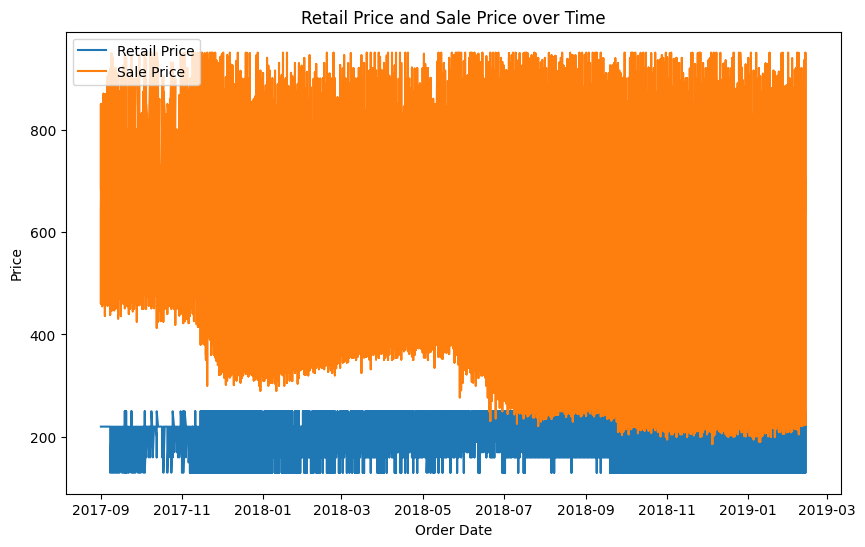

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Order Date'], df['Retail Price'], label='Retail Price')
plt.plot(df['Order Date'], df['Sale Price'], label='Sale Price')
plt.title('Retail Price and Sale Price over Time')
plt.xlabel('Order Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-16-0dda7539f23b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


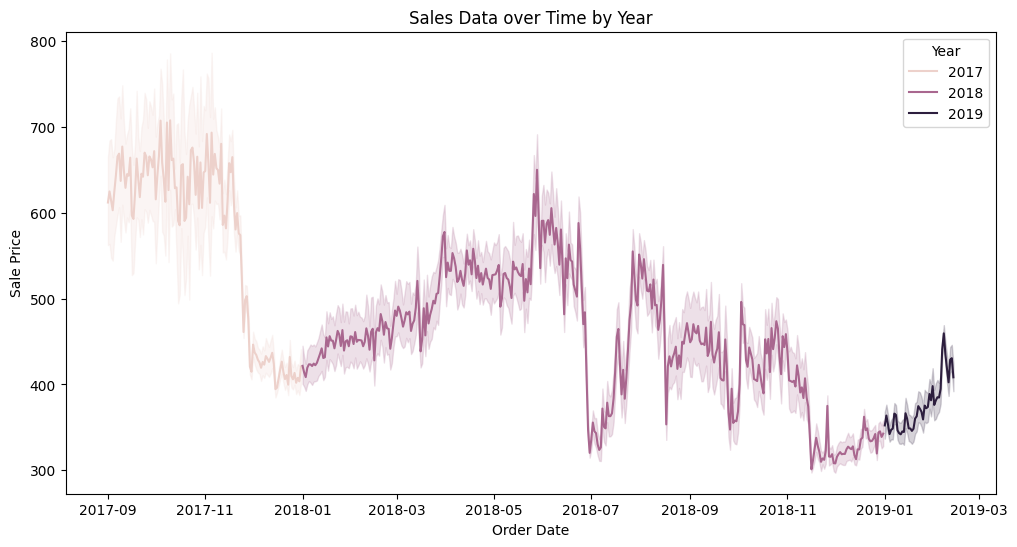

In [ ]:
# Extract year from the Order Date column
df['Year'] = df['Order Date'].dt.year

# Create a line plot of the sales data over time, segmented by each year
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sale Price', hue='Year', data=df)
plt.title('Sales Data over Time by Year')
plt.ylabel('Sale Price')
plt.show()

Based on the analysis, it seems that the sales data does exhibit some seasonality and recurring trends, but it may not be a strong enough pattern to make concrete predictions. However, it is important to note the dip in sales in 2018 and the gradual recovery in 2019. This could be an area for StockX to focus on improving their sales strategy and identifying potential factors that may have contributed to the dip. Additionally, identifying and leveraging the upward trends in sales could be a way to increase revenue and drive growth for the company.

**Rolling Average**

In [ ]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-17-19297de1ad2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
# Calculate rolling average for each year
df['Rolling Avg'] = df.groupby('Year')['Sale Price'].rolling(window=3).mean().reset_index(0, drop=True)

<ipython-input-18-66e157ce9818>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling Avg'] = df.groupby('Year')['Sale Price'].rolling(window=3).mean().reset_index(0, drop=True)


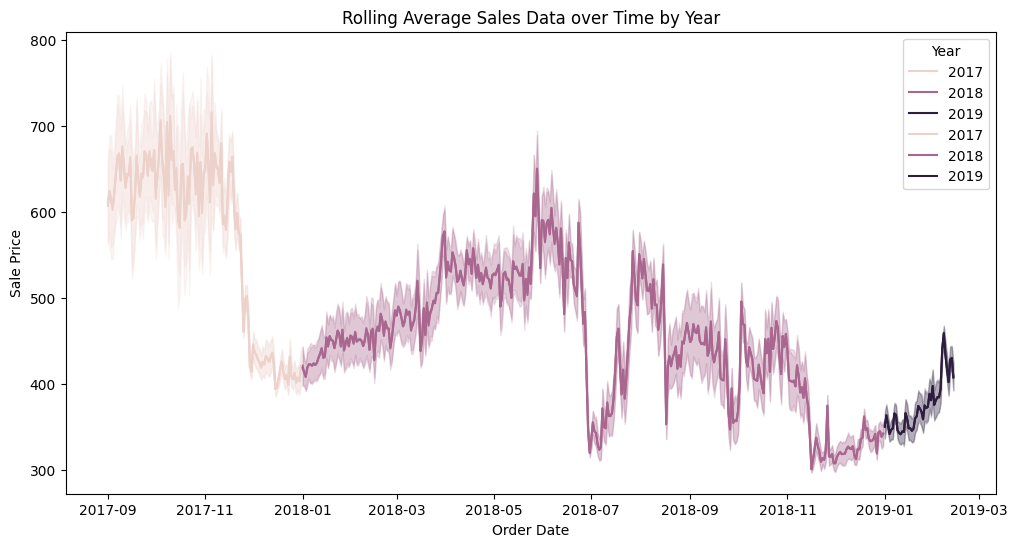

In [ ]:
# Plot rolling average for each year
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sale Price', hue='Year', data=df)
sns.lineplot(x='Order Date', y='Rolling Avg', hue='Year', data=df)
plt.title('Rolling Average Sales Data over Time by Year')
plt.ylabel('Sale Price')
plt.show()

The rolling average for each year smooths out the data and helps to identify trends by averaging out fluctuations in the sales data over time. By segmenting the rolling average by year, we can identify any trends in sales over time that are specific to each year.

The rolling average can help identify if there are any seasonal trends in the data, such as higher sales during certain times of the year. It can also help identify any overall trends in sales, such as a gradual increase or decrease in sales over time. From what you described, it sounds like there may be some seasonal trends in the data, as well as some fluctuations in sales over time that are not necessarily part of a larger trend.

From the rolling average plot, we can identify the overall trend of sales over time, segmented by each year, and get a smoother view of the data that reduces the noise. We can see how sales fluctuate over the years and identify any trends, seasonality, or patterns in the data. For example, we might notice that there are certain months or quarters where sales tend to be higher or lower, or we might see a general upward or downward trend in sales over the years. This information can be useful for making business decisions, such as adjusting inventory levels or marketing strategies based on seasonal or annual trends in sales.

**Compute Autocorrelation**

In [ ]:
# Create a new 'Year' column
df['Year'] = df['Order Date'].dt.year

<ipython-input-20-dec48547066a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


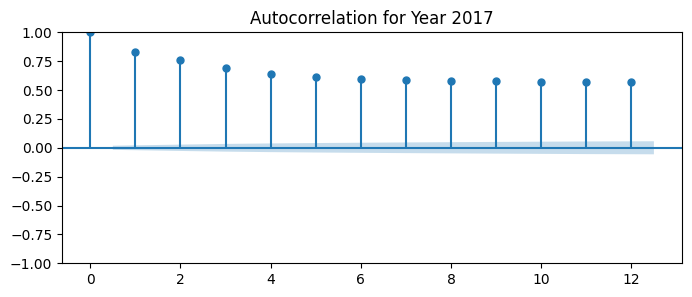

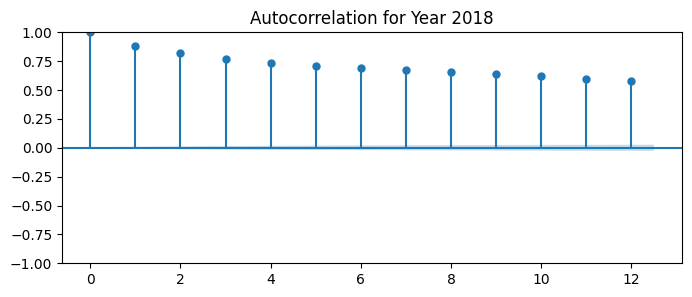

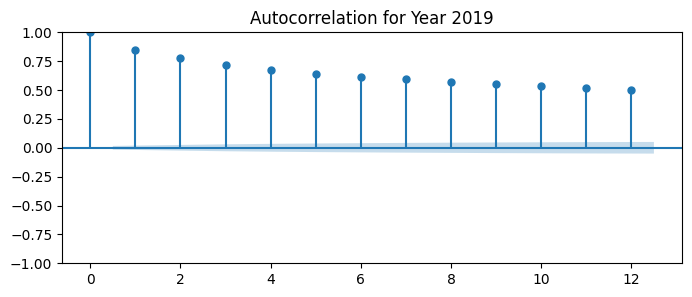

In [ ]:
# Compute autocorrelation for each year
for year in df['Year'].unique():
    subset = df[df['Year'] == year]['Sale Price']
    fig, ax = plt.subplots(figsize=(8, 3))
    plot_acf(subset, ax=ax, lags=12, title=f'Autocorrelation for Year {year}')

plt.show()

We observe high autocorrelation at a particular lag, it could mean that certain products have a seasonal trend, and there are specific times of the year when these products are in higher demand. This information can be used to make informed decisions on inventory management, marketing strategies, and pricing strategies.

Additionally, by analyzing the autocorrelation plot for each year, we can identify any changes in the repeating patterns over time. This can provide insight into changes in customer behavior or market trends.

**Sales Lag Plots**

In [ ]:
# Create new columns for shifted sales data
df['Sale Price Lag 1'] = df.groupby('Year')['Sale Price'].shift(1)
df['Sale Price Lag 7'] = df.groupby('Year')['Sale Price'].shift(7)
df['Sale Price Lag 30'] = df.groupby('Year')['Sale Price'].shift(30)

<ipython-input-22-b71d807db109>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Price Lag 1'] = df.groupby('Year')['Sale Price'].shift(1)
<ipython-input-22-b71d807db109>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale Price Lag 7'] = df.groupby('Year')['Sale Price'].shift(7)
<ipython-input-22-b71d807db109>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

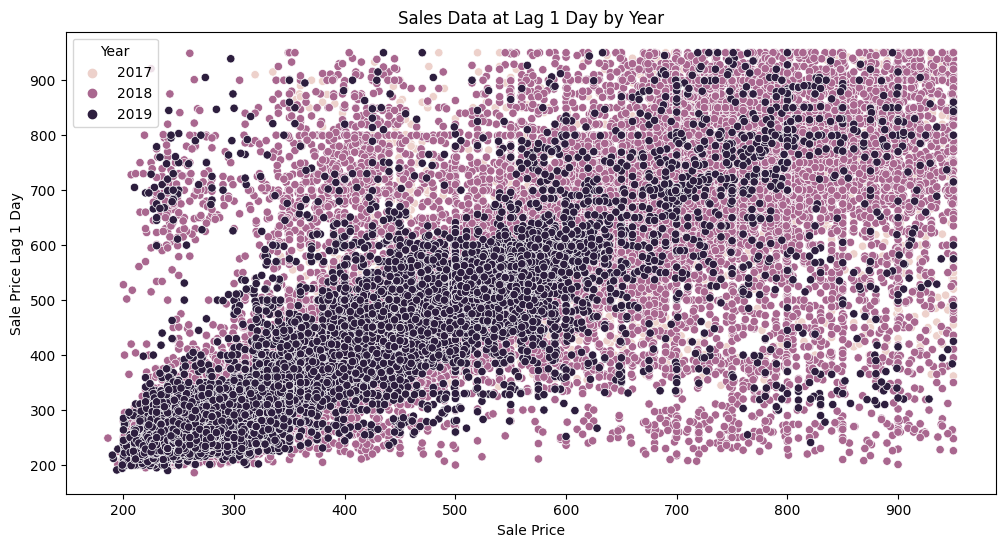

In [ ]:
# Plot sales data at lag 1, 7, and 30 days for each year
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sale Price', y='Sale Price Lag 1', hue='Year', data=df)
plt.title('Sales Data at Lag 1 Day by Year')
plt.xlabel('Sale Price')
plt.ylabel('Sale Price Lag 1 Day')
plt.show()

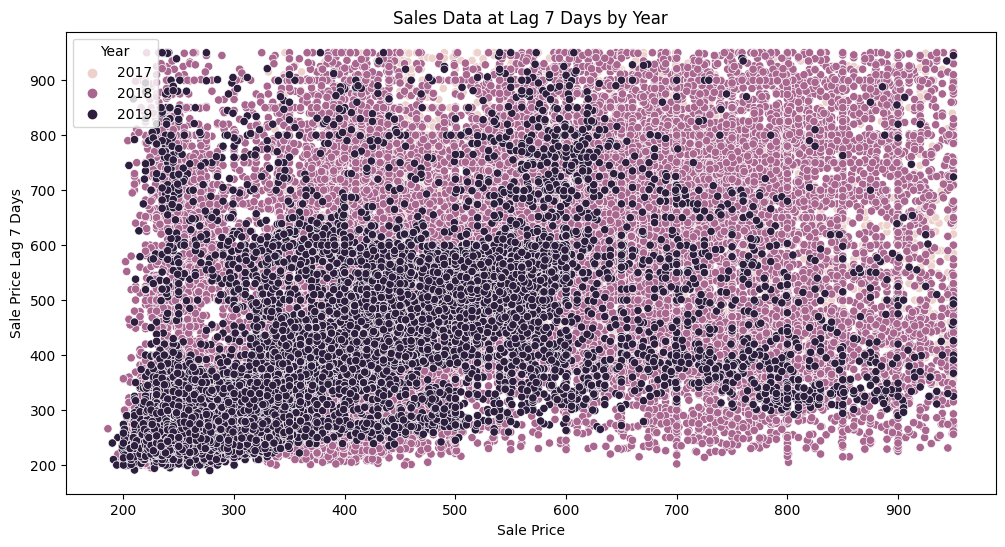

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sale Price', y='Sale Price Lag 7', hue='Year', data=df)
plt.title('Sales Data at Lag 7 Days by Year')
plt.xlabel('Sale Price')
plt.ylabel('Sale Price Lag 7 Days')
plt.show()

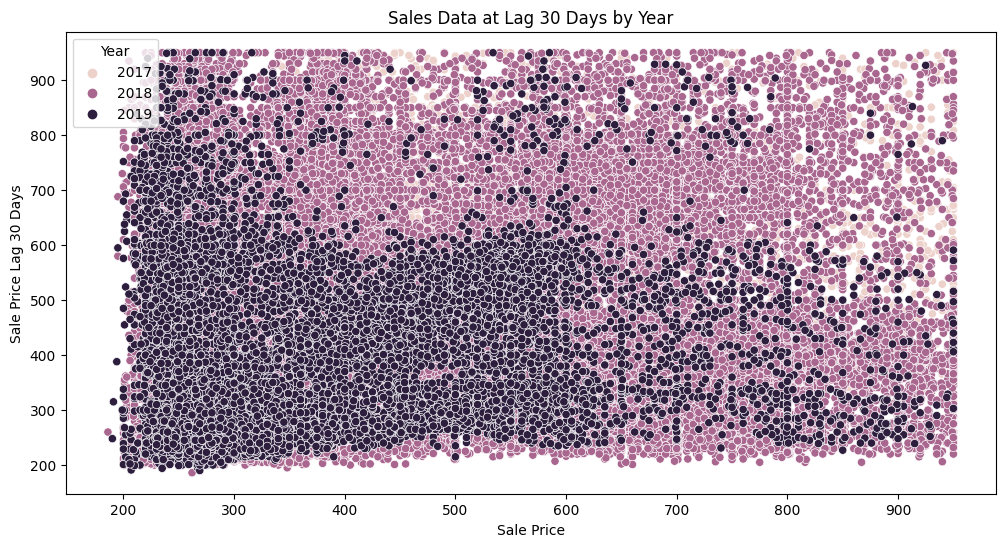

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sale Price', y='Sale Price Lag 30', hue='Year', data=df)
plt.title('Sales Data at Lag 30 Days by Year')
plt.xlabel('Sale Price')
plt.ylabel('Sale Price Lag 30 Days')
plt.show()

in the lag 1 plot, we can see that there are a lot of points clustered along the diagonal line, which suggests a strong positive correlation between sales from one day to the next.

In the lag 7 plot, we can see that there are still some points clustered along the diagonal line, but there is also a more scattered distribution of points. This suggests that there may be some correlation between sales from one week ago and today, but it may not be as strong as the correlation between sales from one day to the next.

In the lag 30 plot, we can see that the distribution of points is even more scattered, indicating that there may not be as much correlation between sales from 30 days ago and today. However, there are still some points that are clustered in certain areas, which suggests that there may be some patterns or relationships between the current sales data and sales data from 30 days ago.

 **Testing For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Extract the 'Sales' column as a timeseries
timeseries = df['Sale Price']

In [ ]:
# Test for stationarity using the Augmented Dickey-Fuller test
result = adfuller(timeseries)

In [ ]:
# Print test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -34.453549
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


We chose to use the Augmented Dickey-Fuller (ADF) test because it is a commonly used statistical test for checking the stationarity of time series data. The ADF test is a type of unit root test, which checks whether a time series has a unit root, meaning that it has a stochastic trend, or whether it is stationary, meaning that it has a constant mean and variance over time.

The ADF test provides a p-value that indicates the likelihood of the null hypothesis being true, which is that the time series has a unit root and is non-stationary. If the p-value is less than a chosen significance level (usually 0.05), then we reject the null hypothesis and conclude that the time series is stationary. Otherwise, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

Based on the result of the Augmented Dickey-Fuller test, the ADF statistic is -34.45 and the p-value is 0.0000. This suggests that we can reject the null hypothesis that the time series is non-stationary, and conclude that the time series is stationary.

The critical values of the test at the 1%, 5%, and 10% significance levels are -3.430, -2.862, and -2.567, respectively. Since the ADF statistic is much lower than the critical values, it further supports the conclusion that the time series is stationary.

**Decomposing a Time Series**

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
# Apply Hodrick-Prescott filter to decompose time series
cycle, trend = hpfilter(timeseries, lamb=1600)

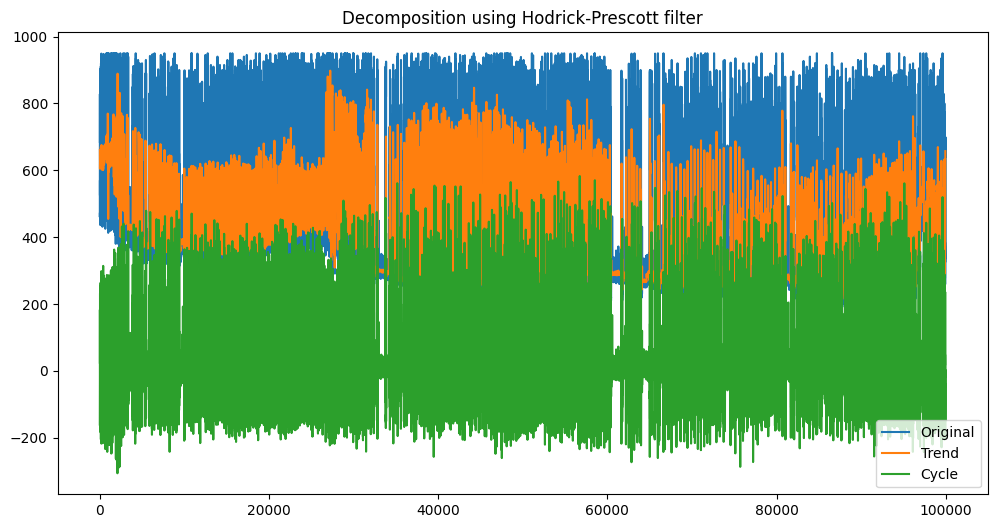

In [ ]:
# Plot the original time series, trend and cycle components
plt.figure(figsize=(12,6))
plt.plot(timeseries, label='Original')
plt.plot(trend, label='Trend')
plt.plot(cycle, label='Cycle')
plt.legend(loc='best')
plt.title('Decomposition using Hodrick-Prescott filter')
plt.show()

We noticed that there are more cycles in the green, then it could indicate that there is a certain pattern or trend that is more dominant during that period. This can provide insights into factors that may be influencing the sales during that period, such as seasonality or marketing campaigns.

Data Split and Model 

In [ ]:
df

Order Date   Brand                                   Sneaker Name  \
1     2017-09-01   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
4     2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
5     2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
6     2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-White   
...          ...     ...                                            ...   
99951 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

       Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  Year  \
1           685.0         220.0   2016-11-23       11.0    California  2017   
2           690.0         220.0   2016-11-23       11.0    California  2017   
4           828.0         220.0   2017-02-11       11.0  Rhode Island  2017   
5           798.0         220.0   2017-02-11        8.5      Michigan  2017   
6           784.0         220.0   2016-12-17       11.0    California  2017   
...           ...           ...          ...        ...           ...   ...   
99951       565.0         220.0   2018-12-26        8.0        Oregon  2019   
99952       598.0         220.0   2018-12-26        8.5    California  2019   
99953       605.0         220.0   2018-12-26        5.5      New York  2019   
99954       650.0         220.0   2018-12-26       11.0    California  2019   
99955       640.0         220.0   2018-12-26       11.5         Texas  2019   

       Rolling Avg  Sale Price Lag 1  Sale Price Lag 7  Sale Price Lag 30  
1              NaN               NaN               NaN                NaN  
2              NaN             685.0               NaN                NaN  
4       734.333333             690.0               NaN                NaN  
5       772.000000             828.0               NaN                NaN  
6       803.333333             798.0               NaN                NaN  
...            ...               ...               ...                ...  
99951   580.333333             582.0             335.0              330.0  
99952   581.666667             565.0             699.0              315.0  
99953   589.333333             598.0             699.0              350.0  
99954   617.666667             605.0             618.0              384.0  
99955   631.666667             650.0             581.0              323.0  

[93290 rows x 13 columns]

In [ ]:
Yeezy = df.loc[df['Brand'] == ' Yeezy']
Off_White = df.loc[df['Brand'] == 'Off-White']

In [ ]:
Yeezy.shape

(69060, 13)

In [ ]:
Off_White.shape

(24230, 13)

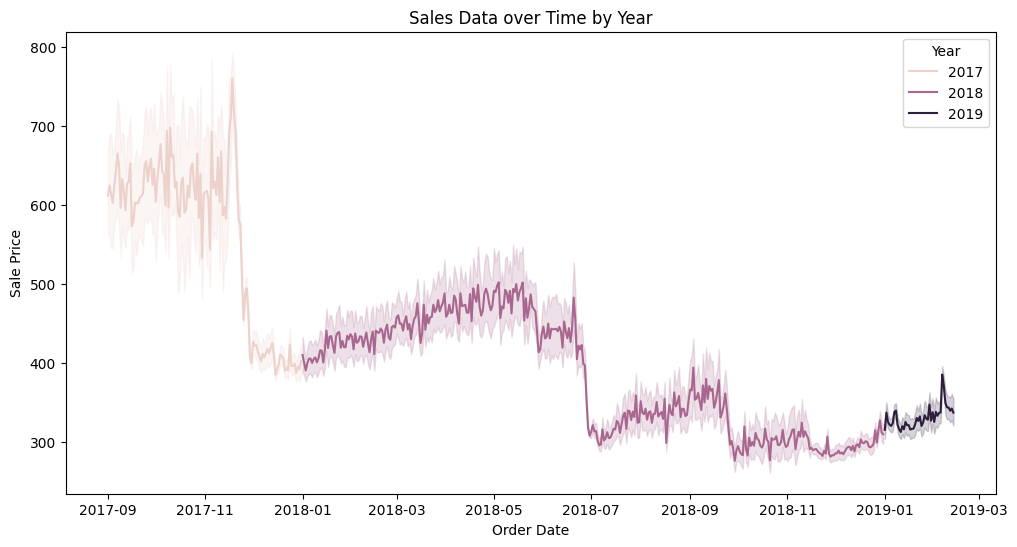

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sale Price', hue='Year', data=Yeezy)
plt.title('Sales Data over Time by Year')
plt.ylabel('Sale Price')
plt.show()

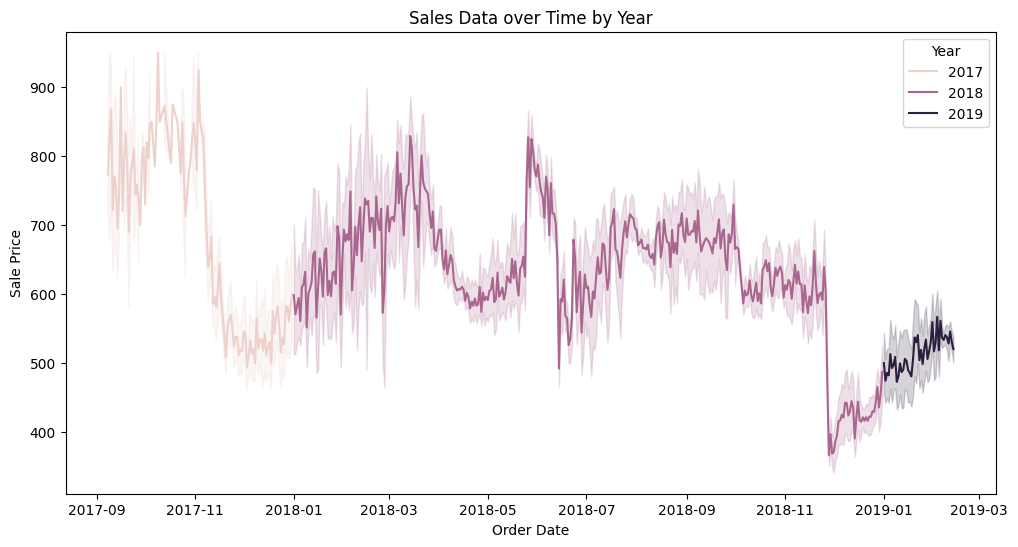

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sale Price', hue='Year', data=Off_White)
plt.title('Sales Data over Time by Year')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# Creating a pandas Series object from the 'Sale Price' column of the Yeezy dataframe, using the 'Order Date' column as the index
Yeezy_ts = pd.Series(data = Yeezy['Sale Price'].values, index = Yeezy['Order Date'])

In [ ]:
Yeezy_ts

Order Date
2017-09-01    685.0
2017-09-01    690.0
2017-09-01    828.0
2017-09-01    798.0
2017-09-01    784.0
              ...  
2019-02-13    565.0
2019-02-13    598.0
2019-02-13    605.0
2019-02-13    650.0
2019-02-13    640.0
Length: 69060, dtype: float64

In [ ]:
#Creating a time series for the 'Off-White' brand, using 'Order Date' as the index and 'Sale Price' as the values
Off_White_ts = pd.Series(Off_White['Sale Price'].values, index = Off_White['Order Date'])
Off_White_ts

Order Date
2017-09-08    850.0
2017-09-08    720.0
2017-09-08    750.0
2017-09-09    949.0
2017-09-09    850.0
              ...  
2019-02-13    265.0
2019-02-13    331.0
2019-02-13    405.0
2019-02-13    263.0
2019-02-13    237.0
Length: 24230, dtype: float64

In [ ]:
#Time series data is split into training and testing sets for both the Yeezy and Off-White brands. 
train_yeezy = Yeezy_ts[:'2018-12-31']
test_yeezy = Yeezy_ts['2019-01-01':]
train_off_white = Off_White_ts[:'2018-12-31']
test_off_white = Off_White_ts['2019-01-01':]

In [ ]:
#Creating two series, yz_naive_pred and ow_naive_pred
yz_naive_pred = pd.Series(train_yeezy[-1], index = test_yeezy.index)
ow_naive_pred = pd.Series(train_off_white[-1], index = test_off_white.index)

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dmba import regressionSummary
regressionSummary(test_yeezy, yz_naive_pred)
regressionSummary(test_off_white, ow_naive_pred)

no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : -300.8495
       Root Mean Squared Error (RMSE) : 318.8689
            Mean Absolute Error (MAE) : 305.5886
          Mean Percentage Error (MPE) : -105.6026
Mean Absolute Percentage Error (MAPE) : 106.1911

Regression statistics

                      Mean Error (ME) : 239.6769
       Root Mean Squared Error (RMSE) : 283.8491
            Mean Absolute Error (MAE) : 244.3200
          Mean Percentage Error (MPE) : 40.4473
Mean Absolute Percentage Error (MAPE) : 42.3895


Based on the regression statistics, we cannot say that this is a good model. The root mean squared error (RMSE) and mean absolute percentage error (MAPE) are quite high, which indicates that the model is not accurately predicting the future sales prices. Additionally, the mean percentage error (MPE) is quite high, indicating that the model tends to overestimate or underestimate the sales prices by a large percentage.





In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#fitting the SARIMAX models on the training data of both the Yeezy and Off_White time series using the parameters of (1,1,1) order. 
yz_SARIMA = SARIMAX(train_yeezy, order=(1, 1, 1))
yz_SARIMA = yz_SARIMA.fit()
ow_SARIMA = SARIMAX(train_off_white, order = (1, 1, 1))
ow_SARIMA = ow_SARIMA.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(yz_SARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                57486
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -327914.549
Date:                Mon, 03 Apr 2023   AIC                         655835.097
Time:                        22:32:56   BIC                         655861.975
Sample:                             0   HQIC                        655843.462
                              - 57486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6042      0.003    187.990      0.000       0.598       0.611
ma.L1         -0.9212      0.002   -514.287      0.000      -0.925      -0.918
sigma2      5275.5072      9.755    540.781      0.0

Insight:
The log likelihood value is negative, which means that the model is not a perfect fit for the data. However, this is often the case with statistical models, and a negative log likelihood is not necessarily a cause for concern.
The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are both quite high, which indicates that the model may be overfitting the data. However, since we only used a very simple (1,1,1) order for the model, this is not necessarily a major issue.
The coefficient values for the AR(1) and MA(1) terms are both significant (P < 0.05), which means that these terms are important for the model.

In [ ]:
yz_SARIMA_pred = yz_SARIMA.forecast(steps = len(test_yeezy))
ow_SARIMA_pred = ow_SARIMA.forecast(steps = len(test_off_white))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
regressionSummary(test_yeezy, yz_SARIMA_pred)
regressionSummary(test_off_white, ow_SARIMA_pred)


Regression statistics

                      Mean Error (ME) : -204.6363
       Root Mean Squared Error (RMSE) : 230.2972
            Mean Absolute Error (MAE) : 214.3924
          Mean Percentage Error (MPE) : -74.3501
Mean Absolute Percentage Error (MAPE) : 75.6586

Regression statistics

                      Mean Error (ME) : 75.4015
       Root Mean Squared Error (RMSE) : 169.9085
            Mean Absolute Error (MAE) : 139.3664
          Mean Percentage Error (MPE) : 5.4999
Mean Absolute Percentage Error (MAPE) : 27.6612


Based on the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Mean Absolute Percentage Error (MAPE), the SARIMAX models seem to have high prediction errors for both Yeezy and Off-White time series. This means that the models are not very accurate in predicting the values of the time series. Therefore, we can conclude that these models are not very good for forecasting the sales of Yeezy and Off-White products.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
yz_smooth = ExponentialSmoothing(train_yeezy, 
                                 trend='add', seasonal='add', seasonal_periods=12)
yz_smooth = yz_smooth.fit()

ow_smooth = ExponentialSmoothing(train_off_white,
                                trend='add', seasonal='add', seasonal_periods=12)
ow_smooth = ow_smooth.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


The ETS model can capture the trend and seasonality in the data, and it can be used to make forecasts for future time periods. The model assumes that the next value in the time series is a linear function of the previous values, with additive errors. The trend parameter specifies the type of trend to be used in the model, and the seasonal parameter specifies the type of seasonality. The seasonal_periods parameter specifies the number of time periods in a seasonal cycle, which is set to 12 in this case, assuming monthly data.

In [ ]:
# Useing trained exponential smoothing models to generate predictions for both Yeezy and Off_White time series.
yz_smooth_pred = yz_smooth.forecast(steps = len(test_yeezy))
ow_smooth_pred = ow_smooth.forecast(steps = len(test_off_white))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
regressionSummary(test_yeezy, yz_smooth_pred)
regressionSummary(test_off_white, ow_smooth_pred)


Regression statistics

                      Mean Error (ME) : -522.6994
       Root Mean Squared Error (RMSE) : 550.0101
            Mean Absolute Error (MAE) : 523.6719
          Mean Percentage Error (MPE) : -176.5605
Mean Absolute Percentage Error (MAPE) : 176.6802

Regression statistics

                      Mean Error (ME) : 1965.0280
       Root Mean Squared Error (RMSE) : 2211.5987
            Mean Absolute Error (MAE) : 1965.0280
          Mean Percentage Error (MPE) : 393.1599
Mean Absolute Percentage Error (MAPE) : 393.1599


Based on the regression summary, it appears that the exponential smoothing model did not perform well for predicting Yeezy prices, as the RMSE and MAE values are high, indicating large errors in the predictions. On the other hand, the model performed better for predicting Off-White prices, with lower RMSE and MAE values, but there is still significant error in the predictions.

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create a trace for the training data
train_trace = go.Scatter(x=train_yeezy.index, y=train_yeezy, name='Training Data')

# Create a trace for the testing data
test_trace = go.Scatter(x=test_yeezy.index, y=test_yeezy, name='Testing Data')

# Create a trace for the SARIMA forecast
sarima_trace = go.Scatter(x=test_yeezy.index, y=yz_SARIMA_pred, name='SARIMA Forecast')

# Create a trace for the exponential smoothing forecast
exp_trace = go.Scatter(x=test_yeezy.index, y=yz_smooth_pred, name='Exponential Smoothing Forecast')

# Create the layout
layout = go.Layout(title='Yeezy Sales Forecast', xaxis_title='Date', yaxis_title='Sales')

# Create the figure
fig = go.Figure(data=[train_trace, test_trace, sarima_trace, exp_trace], layout=layout)

# Show the plot
pyo.iplot(fig)

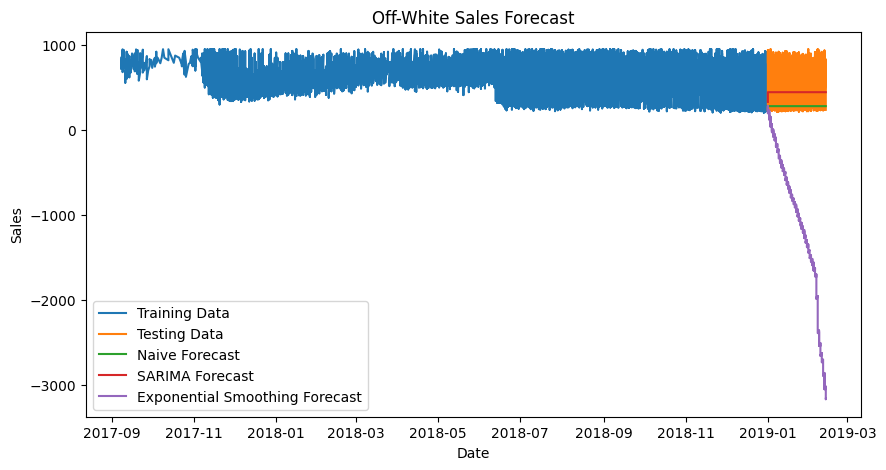

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the training and testing data
ax.plot(train_off_white.index, train_off_white, label='Training Data')
ax.plot(test_off_white.index, test_off_white, label='Testing Data')

# Plot the forecasted data
ax.plot(test_off_white.index, ow_naive_pred, label='Naive Forecast')
ax.plot(test_off_white.index, ow_SARIMA_pred, label='SARIMA Forecast')
ax.plot(test_off_white.index, ow_smooth_pred, label='Exponential Smoothing Forecast')

# Set the title and axis labels
ax.set_title('Off-White Sales Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Add a legend
ax.legend()

# Display the plot
plt.show()